In [5]:
import cv2
import matplotlib.pyplot as plt
import os
def haar(img):
    face_roi = []
    status = False
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

# SIFT

 jumlah keypoint terbentuk 500


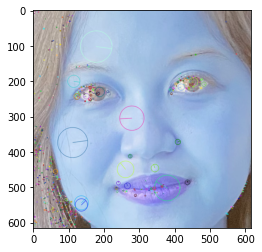

In [6]:
# Important NOTE: Use opencv <= 3.4.2.16 as
# SIFT is no longer available in
# opencv > 3.4.2.16
import cv2
import matplotlib.pyplot as plt

# Loading the image
img = cv2.imread('../dataset/Kirei/IMG_5058.jpg')
status,haarnya=haar(img)
# Applying SIFT detector
sift = cv2.SIFT_create(500)
kpts, des = sift.detectAndCompute(haarnya, None)
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(haarnya, kpts , haarnya ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")

plt.imshow(img)

In [8]:
print(des.shape,descriptor_.shape)

(500, 128) (1000, 128)


# bovw

In [9]:
descriptor_ = des
#kmeans works only on float, so convert integers to float
descriptors_float = descriptor_.astype(float)  

# Perform k-means clustering and vector quantization

from scipy.cluster.vq import kmeans, vq
k = 200  #dari total 500 diambil hanya 200
voc, variance = kmeans(descriptors_float, k, 1) 

# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)
print(im_features)


(1, 200)
[[ 5.  5.  2.  3.  2.  1.  1.  2.  2.  3.  1.  1.  4.  1.  2.  4.  1.  2.
   1.  1.  3.  1.  3.  2.  2.  2.  2.  2.  3.  1.  4.  2.  2.  5.  3.  4.
   3.  1.  1.  1.  2.  4.  2.  3.  4.  2.  6.  2.  3.  7.  1.  1.  4.  3.
   1.  2.  3.  1.  2.  3.  4.  1.  1.  1.  3.  8.  2.  1.  1.  2.  1.  1.
   4.  5.  3.  9.  3.  1.  1.  1.  2.  1.  5.  1.  2.  3.  2.  2.  2.  4.
   1.  2.  2.  1.  3.  3.  4.  3.  6.  5.  3.  3.  6.  1.  1.  1.  1.  2.
   1.  1.  3.  3.  1.  1.  1.  2.  3.  1.  3.  1.  1.  2.  1.  5.  3.  3.
   1.  1.  6.  2.  1.  1.  2.  2.  2.  1.  4.  2.  2. 13.  1.  2.  2.  8.
   1.  2.  1.  2.  4.  1.  4.  7.  3.  1.  3.  2.  3.  1.  3.  1.  2.  2.
   2.  2.  4.  1.  3.  2.  1.  1.  2.  5.  2.  1.  7.  1.  2.  2.  2.  3.
   2.  2.  2.  3.  2.  7.  1.  1.  3.  3.  7.  3.  4.  5.  1.  1.  2.  2.
   1.  1.]]


# HAAR+ SIFT+ BOVW

In [7]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = '../dataset/'  

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)
#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
# brisk = cv2.BRISK_create(30)
sift = cv2.SIFT_create()
#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data = [] 
tampungan_label = []
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name))  #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar
            status, haarnya = haar(img)
            if(status):
                resized=cv2.resize(haarnya,dim, interpolation=cv2.INTER_LINEAR) #resize
                kpts, des = sift.detectAndCompute(resized, None)
                tampungan_data.append(des)
                
                path_parts = path.split('/')
                # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
                last_word = path_parts[-1]
                #preprocessing data / segentasi  boleh dilakukan disini
                tampungan_label.append(last_word)
    X = np.array(tampungan_data, dtype=object) 
    y = np.array(tampungan_label) 

../dataset/
../dataset/Putri
../dataset/Yudha
../dataset/Kirei


In [26]:
descriptors = None
for descriptor in X:
    if descriptors is None:
        descriptors = descriptor
    else:
        descriptors = np.vstack((descriptors, descriptor))

#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)  
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

k = 200  #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(descriptors_float, k, iter=5) 

# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((len(y), k), "float32")
for i in range(len(y)):
    words, distance = vq(X[i],voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)

(195, 200)


In [22]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=PRceoMWcv1U

"""
All cell images resized to 128 x 128
Images used for test are completely different that the ones used for training.
136 images for testing, each parasitized and uninfected (136 x 2)
104 images for training, each parasitized and uninfected (104 x 2)

Cannot import lots of data to Github, so uploaded 10 images of each.
Download full dataset from: ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
"""


import cv2
import numpy as np
import os


# Get the training classes names and store them in a list
#Here we use folder names for class names

#train_path = 'dataset/train'  # Names are Aeroplane, Bicycle, Car
train_path = '../dataset/'  # Folder Names are Parasitized and Uninfected
training_names = os.listdir(train_path)

# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []

#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):    
    return [os.path.join(path, f) for f in os.listdir(path)]

#Fill the placeholder empty lists with image path, classes, and add class ID number
#

for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    image_paths+=class_path


# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
# brisk = cv2.BRISK_create(30)
des_list=[]
sift = cv2.SIFT_create()

image_path_haar = []
class_haar = []
for image_path in image_paths:
    im = cv2.imread(image_path)
    status, haarnya = haar(im)
    if(status):
        resized=cv2.resize(haarnya,dim, interpolation=cv2.INTER_LINEAR) #resize
        kpts, des = sift.detectAndCompute(resized, None)
        des_list.append((image_path, des))
        image_path_haar.append(image_path)
        path_parts = image_path.split('/')
        # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
        last_word = path_parts[-2]
        class_haar.append(last_word)

# Stack all the descriptors vertically in a numpy array

descriptors = None
for image_path_haar, descriptor in des_list:
    if descriptors is None:
        descriptors = descriptor
    else:
        descriptors = np.vstack((descriptors, descriptor))


#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)  
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

k = 200  #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(descriptors_float, k, 1) 

# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((len(class_haar), k), "float32")
for i in range(len(class_haar)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)
print(descriptors_float.shape)

(195, 200)
(16225, 128)


{'Kirei': 0, 'Putri': 1, 'Yudha': 2} jumlah data: 195


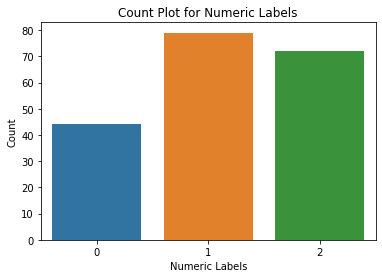

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(f"{label_dict} jumlah data: {len(y)}")

label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)

# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(im_features, label_numerik_array,test_size=0.20, stratify=label_numerik_array) 
#train size adalah persentase data test yang di-split dengan proporsi label yang sama

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))


X_train: (156, 200)
X_test: (39, 200)
y_train: (156,)
y_test: (39,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train, y_train) #pastikan model di "fit" = proses latih

KNeighborsClassifier()

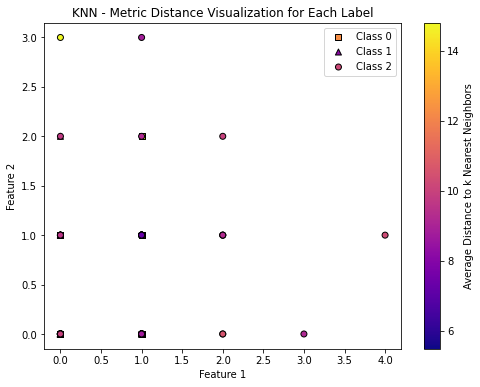

In [17]:
import matplotlib.pyplot as plt

# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))
distances, _ = model.kneighbors(X_train)

# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}

for label in np.unique(y_train):
    # Get the indices of data points belonging to the current label
    label_indices = np.where(y_train == label)[0]
    
    # Get the distances to the k nearest neighbors for data points of the current label
    label_distances = np.mean(distances[label_indices], axis=1)
    
    # Plot the distances for the current label with the corresponding marker shape
    plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])

plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

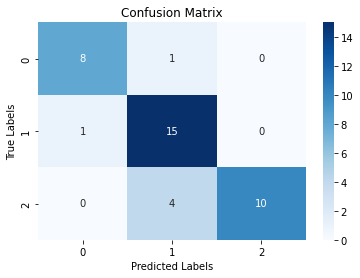

In [19]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

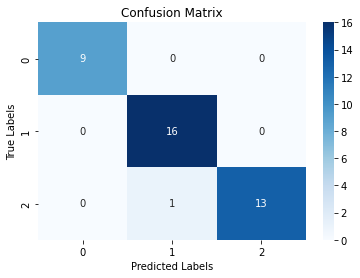

In [12]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.75      0.94      0.83        16
           2       1.00      0.71      0.83        14

    accuracy                           0.85        39
   macro avg       0.88      0.85      0.85        39
weighted avg       0.87      0.85      0.85        39



In [19]:
sift = cv2.SIFT_create(30)


In [ ]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=PRceoMWcv1U


"""
All cell images resized to 128 x 128
Images used for test are completely different that the ones used for training.
136 images for testing, each parasitized and uninfected (136 x 2)
104 images for training, each parasitized and uninfected (104 x 2)
"""


import cv2
import numpy as np
import os
import pylab as pl
from sklearn.metrics import confusion_matrix, accuracy_score #sreeni
from sklearn.externals import joblib


# Load the classifier, class names, scaler, number of clusters and vocabulary 
#from stored pickle file (generated during training)
clf, classes_names, stdSlr, k, voc = joblib.load("bovw.pkl")

# Get the path of the testing image(s) and store them in a list
#test_path = 'dataset/test' # Names are Aeroplane, Bicycle, Car
test_path = 'cell_images/test'  # Folder Names are Parasitized and Uninfected
#instead of test if you use train then we get great accuracy

testing_names = os.listdir(test_path)

# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):
    return [os.path.join(path, f) for f in os.listdir(path)]

#Fill the placeholder empty lists with image path, classes, and add class ID number

for testing_name in testing_names:
    dir = os.path.join(test_path, testing_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1
    
# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)


for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts, des = brisk.detectAndCompute(im, None)
    des_list.append((image_path, des))   
    
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[0:]:
    descriptors = np.vstack((descriptors, descriptor)) 

# Calculate the histogram of features
#vq Assigns codes from a code book to observations.
from scipy.cluster.vq import vq    
test_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        test_features[i][w] += 1

# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (test_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Scale the features
#Standardize features by removing the mean and scaling to unit variance
#Scaler (stdSlr comes from the pickled file we imported)
test_features = stdSlr.transform(test_features)

#######Until here most of the above code is similar to Train except for kmeans clustering####

#Report true class names so they can be compared with predicted classes
true_class =  [classes_names[i] for i in image_classes]
# Perform the predictions and report predicted class names. 
predictions =  [classes_names[i] for i in clf.predict(test_features)]


#Print the true class and Predictions 
print ("true_class ="  + str(true_class))
print ("prediction ="  + str(predictions))

###############################################
#To make it easy to understand the accuracy let us print the confusion matrix

def showconfusionmatrix(cm):
    pl.matshow(cm)
    pl.title('Confusion matrix')
    pl.colorbar()
    pl.show()


accuracy = accuracy_score(true_class, predictions)
print ("accuracy = ", accuracy)
cm = confusion_matrix(true_class, predictions)
print (cm)

showconfusionmatrix(cm)

################# sreeni ###########################
"""
#For classification of unknown files we can print the predictions
#Print the Predictions 
print ("Image =", image_paths)
print ("prediction ="  + str(predictions))

#np.transpose to save data into columns, otherwise saving as rows

np.savetxt ('mydata.csv', np.transpose([image_paths, predictions]),fmt='%s', delimiter=',', newline='\n')
"""